In [ ]:
#kimlik doğrulama işlemi :drive in içinde çalışma ortamı sağlarız serverlarda
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
# LOADING THE SAVED NUMPY ARRAYS OF DATA AND TARGET

import numpy as np
X_train=np.load('./MyDrive/Urban_Sounds_Classification/X_train.npy')
y_train=np.load('./MyDrive/Urban_Sounds_Classification/y_train.npy')
X_val=np.load('./MyDrive/Urban_Sounds_Classification/X_val.npy')
X_test=np.load('./MyDrive/Urban_Sounds_Classification/X_test.npy')
y_val=np.load('./MyDrive/Urban_Sounds_Classification/y_val.npy')
y_test=np.load('./MyDrive/Urban_Sounds_Classification/y_test.npy')

In [ ]:
X_train.shape

(6987, 100, 100, 1)

In [ ]:
X_test[789]

array([[[1.        ],
        [0.00392157],
        [0.00392157],
        ...,
        [0.00392157],
        [0.00392157],
        [0.00392157]],

       [[1.        ],
        [0.00392157],
        [0.00392157],
        ...,
        [0.00392157],
        [0.00392157],
        [0.00392157]],

       [[1.        ],
        [0.00392157],
        [0.00392157],
        ...,
        [0.00392157],
        [0.00392157],
        [0.00392157]],

       ...,

       [[1.        ],
        [0.37254902],
        [0.41176471],
        ...,
        [0.37647059],
        [0.34117647],
        [0.3254902 ]],

       [[1.        ],
        [0.22352941],
        [0.02352941],
        ...,
        [0.2       ],
        [0.12941176],
        [0.20392157]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]]])

In [ ]:
# IMPORTING LAYERS, MODEL, AND CALLBACK FOR MODEL TRAINING 

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,BatchNormalization,Activation
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [ ]:
# INITIALIZING THE MODEL

model=Sequential()

In [ ]:
# ADDING LAYERS

model.add(Conv2D(32,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers


model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#The third convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#The fourth convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#The fourth convolution layer followed by Relu and MaxPooling layers



In [ ]:
# FLATTENING THE LAYER AND ADDING THE OUTPUT 
model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(64,activation='relu'))

model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))
#The Final layer with two outputs for two categories

In [ ]:
# COMPILING THE MODEL

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# TRAINING THE MODEL
history=model.fit(X_train , y_train,epochs=200,validation_data = (X_val , y_val))

Epoch 1/200
219/219 [==============================] - 9s 16ms/step - loss: 1.9369 - accuracy: 0.3230 - val_loss: 2.7773 - val_accuracy: 0.1615
Epoch 2/200
219/219 [==============================] - 3s 14ms/step - loss: 1.4639 - accuracy: 0.4753 - val_loss: 2.4467 - val_accuracy: 0.1913
Epoch 3/200
219/219 [==============================] - 3s 14ms/step - loss: 1.2463 - accuracy: 0.5467 - val_loss: 1.2040 - val_accuracy: 0.5739
Epoch 4/200
219/219 [==============================] - 3s 14ms/step - loss: 1.1137 - accuracy: 0.6003 - val_loss: 1.0706 - val_accuracy: 0.6220
Epoch 5/200
219/219 [==============================] - 3s 14ms/step - loss: 1.0055 - accuracy: 0.6456 - val_loss: 1.1036 - val_accuracy: 0.6105
Epoch 6/200
219/219 [==============================] - 3s 14ms/step - loss: 0.9280 - accuracy: 0.6800 - val_loss: 0.7784 - val_accuracy: 0.7377
Epoch 7/200
219/219 [==============================] - 3s 14ms/step - loss: 0.8537 - accuracy: 0.6999 - val_loss: 0.8333 - val_accuracy:

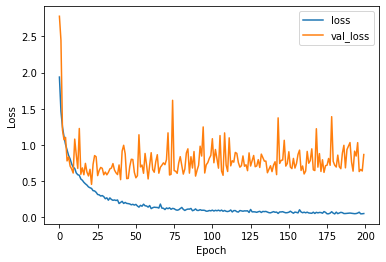

In [ ]:
import matplotlib.pyplot as plt
# Plot the the training loss
plt.plot(history.history["loss"],label = "loss")

# Plot the the validation loss
plt.plot(history.history["val_loss"],label = "val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

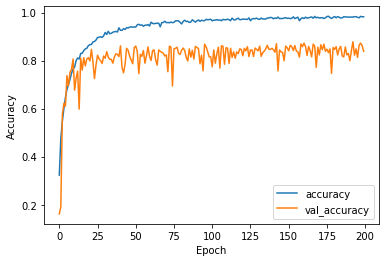

In [ ]:
# Plot the the training accuracy
plt.plot(history.history["accuracy"] , label="accuracy")

# Plot the the validation accuracy
plt.plot(history.history["val_accuracy"] , label = "val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()

# Show the plot
plt.show()

Performance evaluation

In [ ]:
# Evaluate the performance
model.evaluate(X_test , y_test)

28/28 [==============================] - 0s 11ms/step - loss: 0.8540 - accuracy: 0.8547


[0.854022741317749, 0.8546910881996155]

Try a prediction

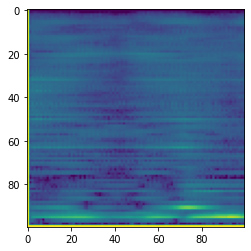

(100, 100, 1)


In [ ]:
import tensorflow as tf
# Use the .imshow() function and show the plot
plt.imshow(( tf.squeeze(X_test[873]) ))

plt.show()
# Print the shape of the sample image
print(X_test[873].shape)

In [ ]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[873].reshape(1,32,32,1))

# Print the prediction result
prediction_result

array([[1.2289767e-09, 5.6375176e-09, 6.1179437e-11, 8.7086516e-10,
        9.9999630e-01, 2.8002715e-08, 2.2431135e-12, 3.6889387e-06,
        1.6890905e-09, 1.9815072e-10]], dtype=float32)

In [ ]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [ ]:
# Print the results
print(f"This image blong to class {predicted_class} with {predicted_probability} probability %")

This image blong to class 4 with 0.9999963045120239 probability %
